# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
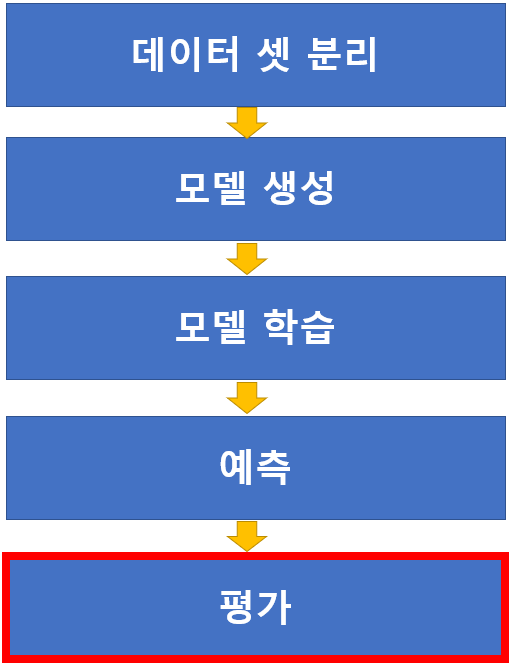

# 분류와 회귀의 평가방법

### 분류 평가 지표 - 맞춘다는 가정하에 얼마나 틀리는지
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법 - 못맞춘다는 가정하에 얼마나 맞는지
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

## 다중 분류(Multi class classification) - 정확도(accuracy) 가 main
- Target이 여러개의 클래스(범주값)으로 구성된 분류문제
    - 여러개의 클래스중 하나를 분류한다.
    
##  이진 분류(Binary classification) - 맞는지 아닌지 판별
- 어떤 항목인지 아닌지를 분류한다.
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 아닌 것. 보통 0로 표현한다.
- 예
    - 환자인가?
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? 
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가?
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
    - 전체 중 몇 개가 맞았는지에 대한 평가 지표이므로 양성(Positive)만의 성능 또는 음성(Negative)만의 성능을 알 수 없다.
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다. - 극단적 예시지만 이러한 오류 가능

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [65]:
mnist

AttributeError: to_frame

In [61]:
from sklearn.datasets import load_digits

import numpy as np
import matplotlib.pyplot as plot

mnist = load_digits()
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [66]:
X,y = mnist['data'], mnist['target'] # mnist.data, mnist.target
X.shape, y.shape, type(X), type(y)
# X: image -> 8x8 2차원배열을 flatten(1차원으로 reshape)함

((1797, 64), (1797,), numpy.ndarray, numpy.ndarray)

In [68]:
mnist.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [72]:
y,y[:5]

(array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4]))

In [73]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [74]:
X.min(), X.max()

(0.0, 16.0)

In [75]:
# X[0] 첫번째 사진 (64, ) <- (8,8)
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

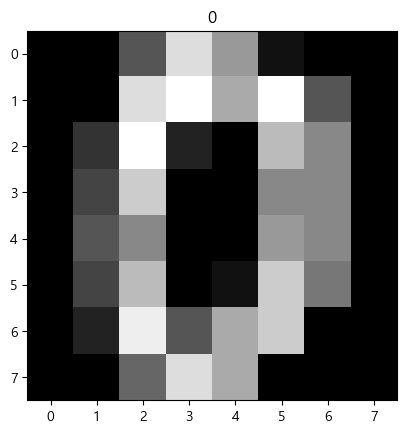

In [15]:
plot.imshow(X[0].reshape(8,8),cmap='gray') #cmap='Greys') # 색이 반대로 변한다.
plot.title(str(y[0]))
plot.show()

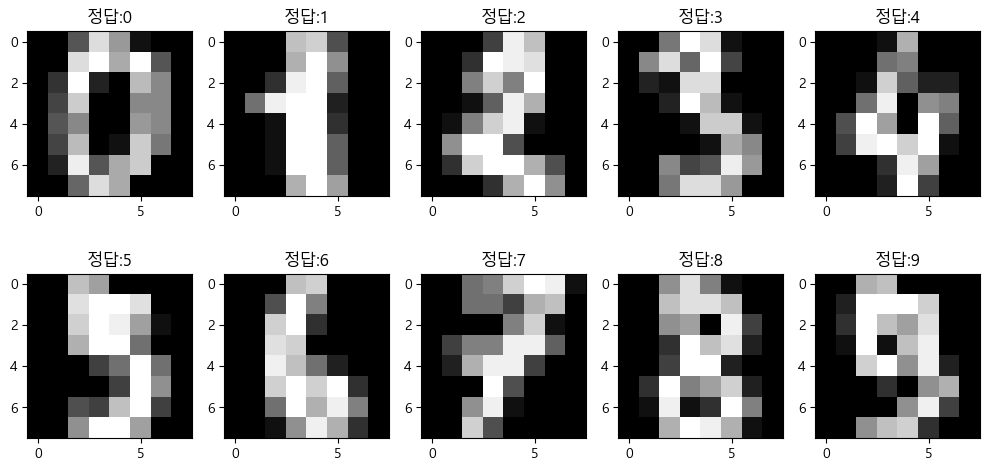

In [21]:
plot.figure(figsize=(10,5))
for i in range(10):
    plot.subplot(2,5,i+1)
    plot.imshow(X[i].reshape(8,8),cmap="gray")
    plot.title(f"정답:{y[i]}")

plot.tight_layout()
plot.show()

In [26]:
X[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [27]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
y=np.where(y==9,1,0) # 9이면 1 아니면 0

In [38]:
np.unique(y,return_counts=True) # 9가 아닌것이 1617개, 9가 180개

(array([0, 1]), array([1617,  180], dtype=int64))

In [39]:
1617/(1617+180), 180/(1617+180)

(0.8998330550918197, 0.1001669449081803)

### 데이터셋 분할
- train/test 로 분할

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [42]:
np.unique(y_train,return_counts=True)[1]/y_train.size

array([0.89977728, 0.10022272])

In [43]:
np.unique(y_test,return_counts=True)[1]/y_test.size

array([0.9, 0.1])

### 모델 생성 및 학습

#### Dummy Model 정의
- dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [44]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [45]:
# dummy 모델 생성
d_model = DummyClassifier(strategy='most_frequent') # 정답(y)의 최빈값을 결과로 출력

# dummy 모델 학습
d_model.fit(X_train,y_train) #y의 최빈값을 찾는다

# dummy 모델 추론
pred_train=d_model.predict(X_train) # y_train의 최빈값으로 추정
pred_test=d_model.predict(X_test)


In [46]:
np.unique(pred_train),np.unique(pred_test)

(array([0]), array([0]))

In [47]:
accuracy_score(y_train,pred_train),accuracy_score(y_test,pred_test)

(0.8997772828507795, 0.9)

아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

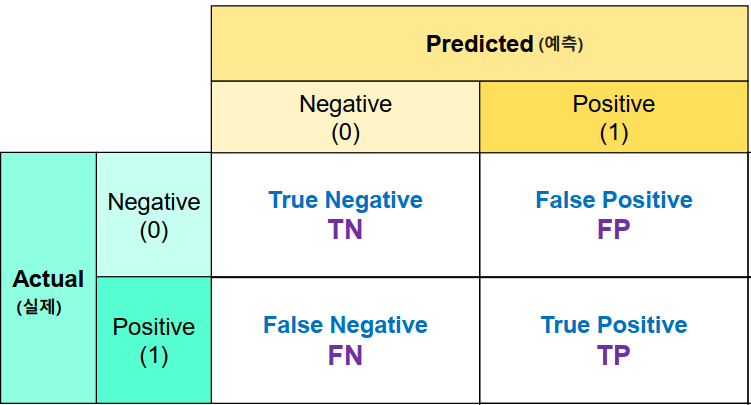

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

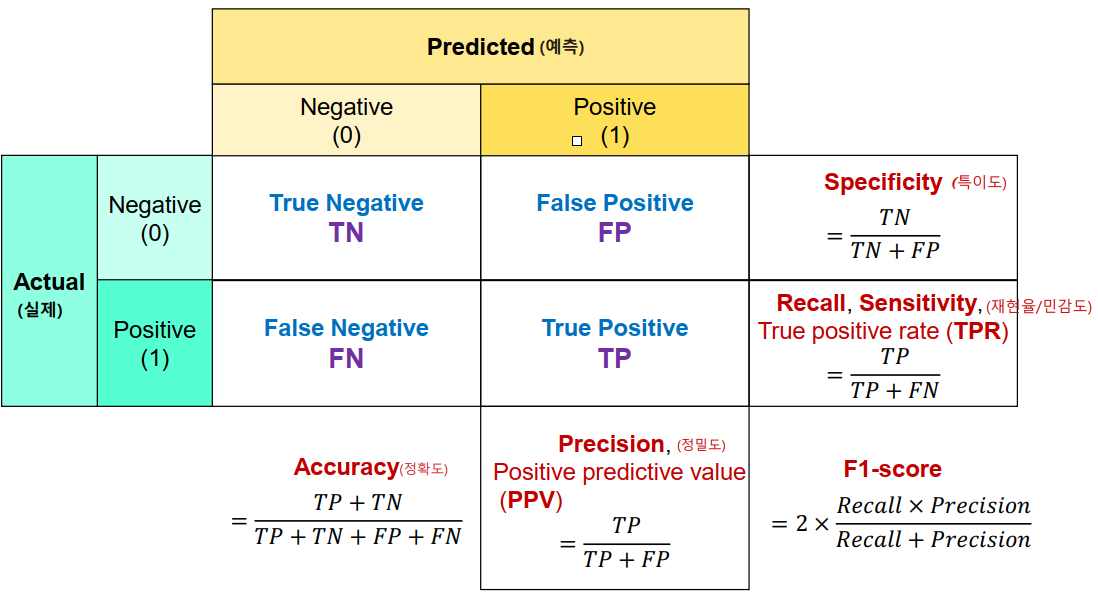

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             recall_score, 
                             accuracy_score, 
                             precision_score,
                             f1_score)

In [50]:
result_cm_1 = confusion_matrix(y_train,pred_train)
result_cm_1

array([[1212,    0],
       [ 135,    0]], dtype=int64)

In [52]:
result_cm_2=confusion_matrix(y_test,pred_test)
result_cm_2

array([[405,   0],
       [ 45,   0]], dtype=int64)

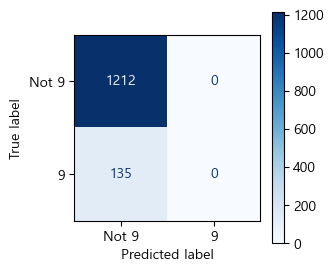

In [54]:
plt.figure(figsize=(3,3))
ax = plt.gca()
disp = ConfusionMatrixDisplay(result_cm_1, #confusion_matrix계산한 배열
                              display_labels=["Not 9", "9"])  #0, 1의 ticks 라벨을 변경.
disp.plot(cmap="Blues", ax=ax)
plt.show()

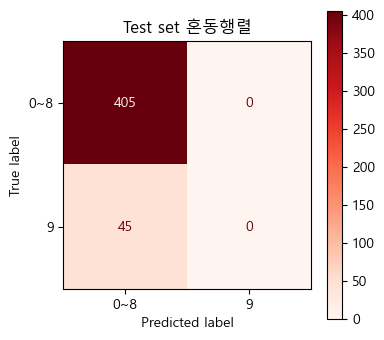

In [55]:
plt.figure(figsize=(4,4))
ax = plt.gca()
disp2 = ConfusionMatrixDisplay(result_cm_2, display_labels=['0~8', '9'])
disp2.plot(cmap='Reds', ax=ax)
plt.title("Test set 혼동행렬")
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [56]:
print("Accuracy")
accuracy_score(y_train,pred_train),accuracy_score(y_test,pred_test)

Accuracy


(0.8997772828507795, 0.9)

In [57]:
print("Recall")
recall_score(y_train,pred_train),recall_score(y_test,pred_test)

Recall


(0.0, 0.0)

In [58]:
print("Precision")
precision_score(y_train,pred_train),precision_score(y_test,pred_test)

Precision


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [59]:
print("f1-score")
f1_score(y_train,pred_train),f1_score(y_test,pred_test)

f1-score


(0.0, 0.0)

# TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3,random_state)

- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [95]:
%%writefile metrics.py
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             recall_score, 
                             accuracy_score, 
                             precision_score,
                             f1_score)
def plot_confusion_matrix(y,pred,title=None):
    '''
    confusion matrix 를 시각화한 함수
    [parameter]
    y : ndarray - 정답(ground truth)
    pred : ndarray - 모델이 추정한 값
    title : str - 그래프의 제목(title)
    '''
    cm=confusion_matrix(y,pred)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()

def print_metrics_classification(y,pred,title=None):
    '''
    분류의 평가지표 점수들을 출력하는 함수
    accuracy, recall, precision, f1 score 출력
    [parameter]
    y:ndarray - 정답
    pred:ndarray - 모델 추정값
    title:str - 제목
    '''
    if title:
        print(f"======={title}=======")
    print(f"정확도(accuracy):{accuracy_score(y,pred)}")
    print(f"재현율(recall):{recall_score(y,pred)}")
    print(f"정밀도(precision):{precision_score(y,pred)}")
    print(f"f1_score:{f1_score(y,pred)}")
    
    

Writing metrics.py


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from metrics import plot_confusion_matrix as pcm, print_metrics_classification as pmc

In [91]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0)
#
tree.fit(X_train,y_train)
rfc.fit(X_train,y_train)

# 평가
pred_train_tree=tree.predict(X_train)
pred_test_tree=tree.predict(X_test)

pred_train_rfc=rfc.predict(X_train)
pred_test_rfc=rfc.predict(X_test)


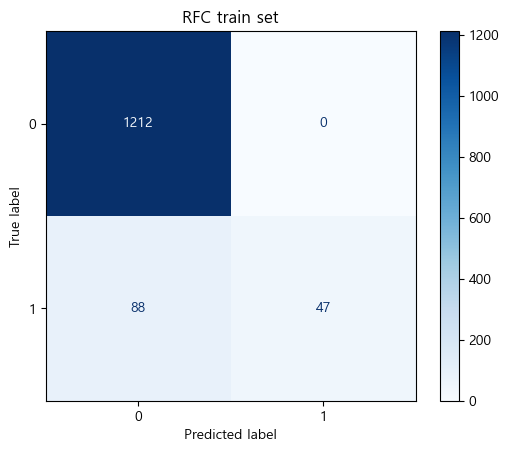

In [97]:
pcm(y_train,pred_train_rfc,'RFC train set')

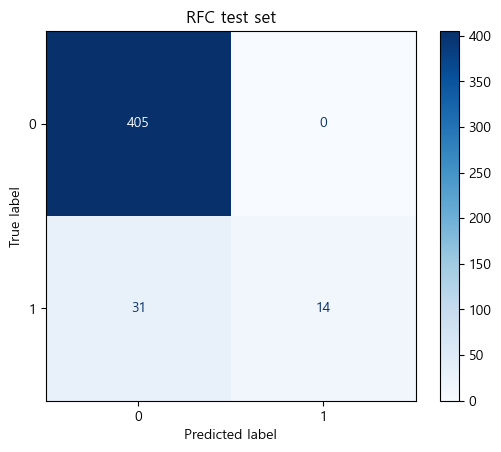

In [98]:
pcm(y_test,pred_test_rfc,'RFC test set')

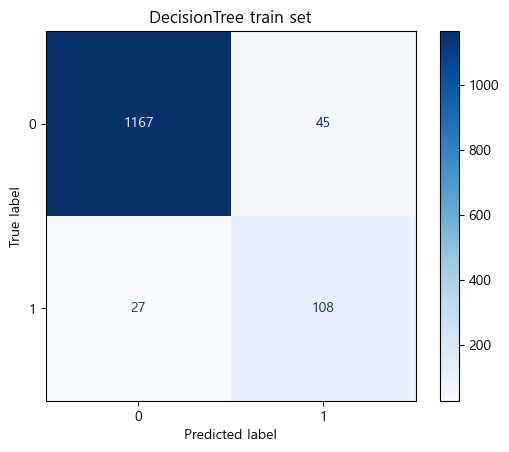

In [88]:
plot_confusion_matrix(y_train,pred_train_tree,title='DecisionTree train set')

In [94]:
print_metrics_classification(y_train,pred_train_tree,'DecisionTree Train set 평가')
print_metrics_classification(y_test,pred_test_tree,'DecisionTree Test set 평가')

=======DecisionTree Train set 평가=======
정확도(accuracy):0.9465478841870824
재현율(recall):0.8
정밀도(precision):0.7058823529411765
f1_score:0.7500000000000001
=======DecisionTree Test set 평가=======
정확도(accuracy):0.9511111111111111
재현율(recall):0.7555555555555555
정밀도(precision):0.7555555555555555
f1_score:0.7555555555555555


In [99]:
pmc(y_train,pred_train_tree,'DecisionTree Train set 평가')
pmc(y_test,pred_test_tree,'DecisionTree Test set 평가')
pmc(y_train,pred_train_rfc,'rfc Train set 평가')
pmc(y_test,pred_test_rfc,'rfc Test set 평가')

=======DecisionTree Train set 평가=======
정확도(accuracy):0.9465478841870824
재현율(recall):0.8
정밀도(precision):0.7058823529411765
f1_score:0.7500000000000001
=======DecisionTree Test set 평가=======
정확도(accuracy):0.9511111111111111
재현율(recall):0.7555555555555555
정밀도(precision):0.7555555555555555
f1_score:0.7555555555555555
=======rfc Train set 평가=======
정확도(accuracy):0.9346696362286563
재현율(recall):0.34814814814814815
정밀도(precision):1.0
f1_score:0.5164835164835165
=======rfc Test set 평가=======
정확도(accuracy):0.9311111111111111
재현율(recall):0.3111111111111111
정밀도(precision):1.0
f1_score:0.4745762711864407


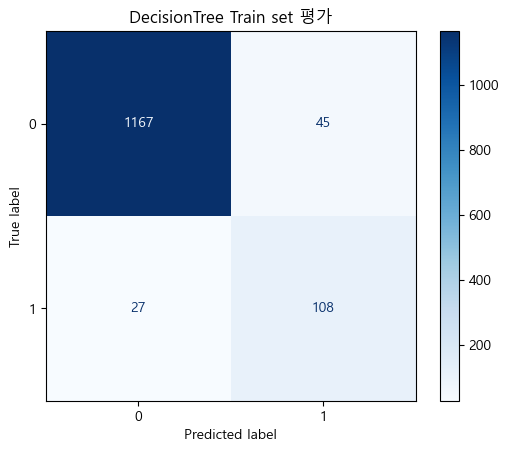

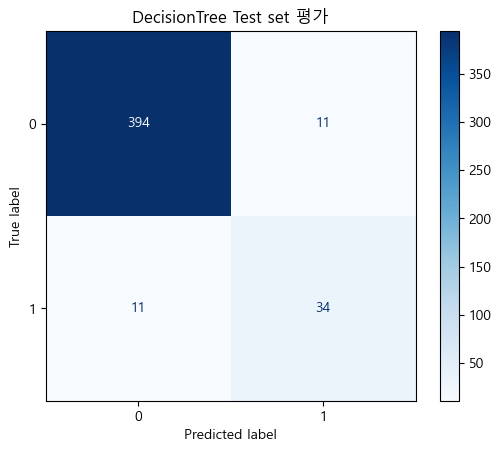

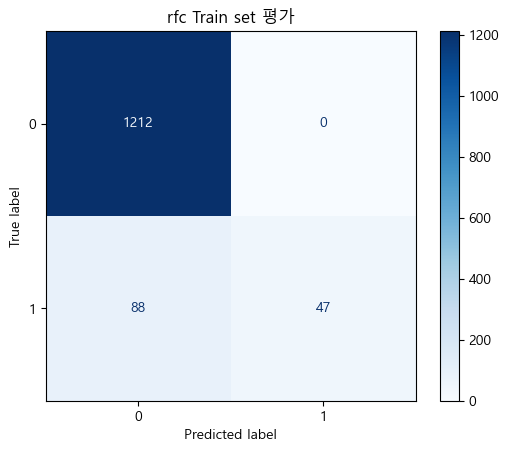

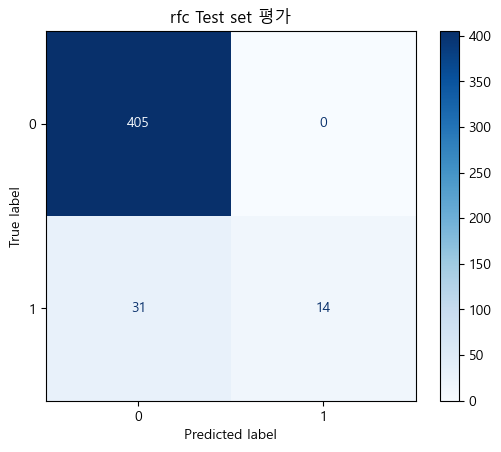

In [100]:
pcm(y_train,pred_train_tree,'DecisionTree Train set 평가')
pcm(y_test,pred_test_tree,'DecisionTree Test set 평가')
pcm(y_train,pred_train_rfc,'rfc Train set 평가')
pcm(y_test,pred_test_rfc,'rfc Test set 평가')

### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**
- 둘다 좋은것이 좋지만 trade-off가 있다면 어떤 것이 좋은 경우가 더 나은 결과를 가지는지 확인


### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 초점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

In [101]:
tree.predict(X_train[:3]) # (분류 모델) 추론결과 :  Label(class)

array([0, 0, 0])

In [108]:
tree.predict_proba(X_train[:3]) # 분류에서만 사용가능 - 추론 결과 : class 별 확률을 반환 [class1, class2, class3, ... ]
# 이 경우에서는 [0 확률, 1 확률]

array([[0.99173554, 0.00826446],
       [0.96610169, 0.03389831],
       [0.98695652, 0.01304348]])

In [106]:
rfc.predict(X_train[:3])

array([0, 0, 0])

In [107]:
rfc.predict_proba(X_train[:3])

array([[0.93277898, 0.06722102],
       [0.57883582, 0.42116418],
       [0.94635172, 0.05364828]])

In [111]:
pp=rfc.predict_proba(X_train[:3])[:,1] # 1(pos)의 확률
pp

array([0.06722102, 0.42116418, 0.05364828])

In [115]:
np.where(pp>0.5,1,0) # 조건, true일때, false일때

array([0, 0, 0])

In [116]:
np.where(pp>0.3,1,0)

array([0, 1, 0])

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

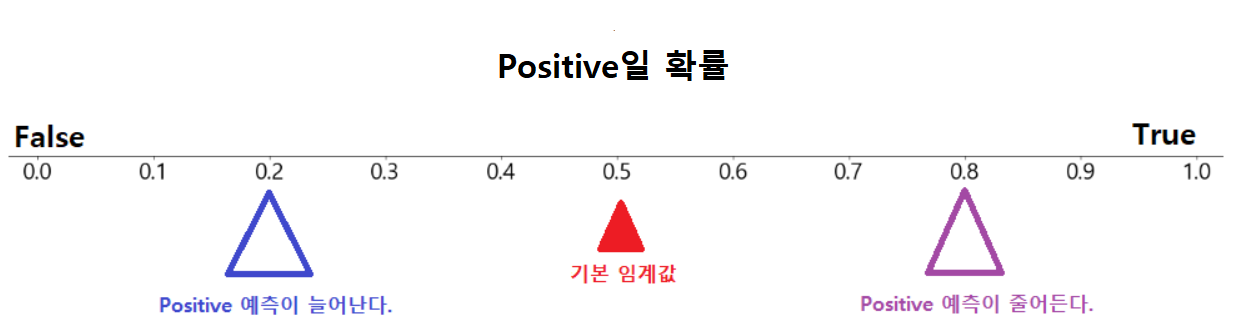

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면(pos 예측 증가) 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면(pos 예측 감소) 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.** 위양성율


### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [117]:
# 모델이 추론한 positive의 확률 조회
# Decision Tree
pos_test_tree=tree,predict_proba(X_test)
pos.test_tree.shape

NameError: name 'predict_proba' is not defined

In [120]:
from sklearn.metrics import precision_recall_curve
result = precision_recall_curve(y_test,pos_test,pos_test_tree) #(정다바

NameError: name 'pos_test' is not defined

In [121]:
precision_list, recall_list,thresh_list=result
precision_list.shape, recall_list.shape, thresh_list.shape

NameError: name 'result' is not defined

In [ ]:
thresh_list=np.append(thresh_list,1)
thresh_list

In [122]:
print('idx. prec, recall, thresh')
for idx, (p,r,t) in enumerate(zip(precision_list, recall_list, thresh_list)):
    print(f"{idx}.{p:4f},{r:4f},{t:.4f}")

idx. prec, recall, thresh


NameError: name 'precision_list' is not defined

In [128]:
import matplotlib.pyplot as plt
plt.plot(thresh_list,precision_list, marker='.',label='정밀도')
plt.plot(thresh_list,recall_list, marker='.',label='재현율')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'thresh_list' is not defined

In [124]:
from metrics import print_metrics_classification

pred_test=tree.predict(X_test)
print_metrics_classification(y_test,pred_test,title='threshold : 0.5')

=======threshold : 0.5=======
정확도(accuracy):0.9511111111111111
재현율(recall):0.7555555555555555
정밀도(precision):0.7555555555555555
f1_score:0.7555555555555555


### 임계값 변경 후처리를 통한 recall/precision 변경 

In [125]:
#임계점 내리기
pred_test_01 = np.where(pos_test_tree > 0.1, 1 ,0)
np.unique(pred_test,return_counts=True),np.unique(pred_test_01,return_counts=True)

NameError: name 'pos_test_tree' is not defined

In [126]:
print_metrics_classification(y_test,pred_test_01)

NameError: name 'pred_test_01' is not defined

In [127]:
#임계점 올리기
pred_test_06 = np.where(pos_test_tree > 0.6,1,0)
np.unique(pred_test_06,return_counts=True)

NameError: name 'pos_test_tree' is not defined

In [ ]:
print_metrics_classification(y_test,pred_test_06)

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
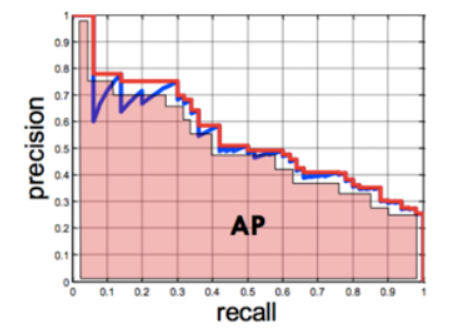   

In [130]:
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay, # graph 그려주기
                             average_precision_score) # 면적계산해서점수화

In [131]:
#test set 검증
pos_test_tree=tree.predict_proba(X_test)[:,1] #negative 는 [:,0]
pos_test_rfc=rfc.predict_proba(X_test)[:1]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay(cm)

In [129]:
## recall precision, threshold 값들 조회
# DecisionTree
precision_list1,recall_list1,thresh1=precision_recall_curve(y_test,pos_test_tree)
disp_tree=PrecisionRecallDisplay(precision_list1,
                                 recall_list1,
                                 average_precision=ap_score,
                                 estimator_name='DecisionTree')
disp_tree.plot()
plt.title("DecisionTree Testset PR curve")
plt.show()

NameError: name 'pos_test_tree' is not defined

In [134]:
ap_score=average_precision_score(y_test,pos_test_tree) #(y정답, positive확률)
ap_score

0.6766948888666132

In [ ]:
### RandomForest 
## DecisionTree
ap_score_rfc = average_precision_score(y_test, pos_test_rfc)  # (y정답, positive확률)

#recall, precision, threshold값들 조회
precision_list2, recall_list2, _ = precision_recall_curve(y_test, pos_test_rfc)
disp_tree = PrecisionRecallDisplay(precision_list2,
                                   recall_list2, 
                                   average_precision=ap_score_rfc, 
                                   estimator_name="RandomForest")
disp_tree.plot()
plt.title('RandomForest Testset PR Curve')
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 낮을 수록 좋다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을 수록 좋다.
    $$
    \frac{TP}{FN+TP}
    $$
- Positive의 임계값을 변경할 경우 **FPR과 TPR(recall)은 비례해서 변화한다.**
- <b style='font-size:1.3em'>ROC Curve</b>
    - 이진 분류의 성능 평가 지표
    - Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율(TPR)과 위양성율(FPR)의 변화를 이용해 모델의 성능을 평가한다.
        - FPR 변화할 때 TPR이 어떻게 변하는 지를 평가한다.
    - FPR을 X축, TPR을 Y축으로 놓고  놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
    - Positive(양성), Negative(음성) 에 대한 모델의 성능의 강건함(robust)을 평가한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

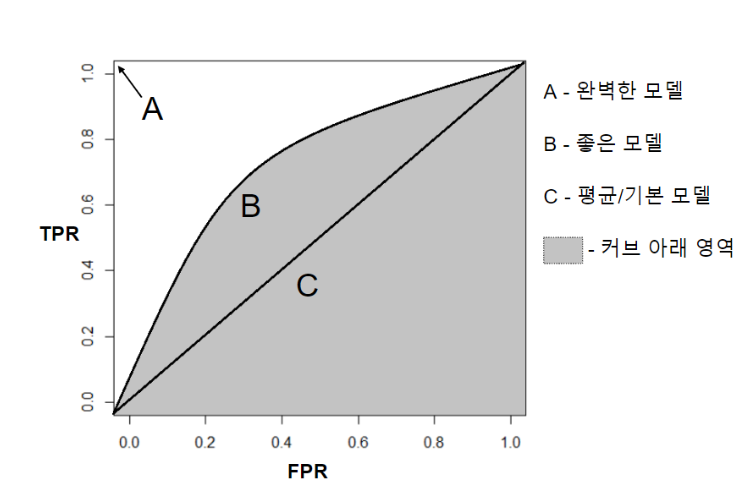

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

### 데이터셋 생성

### 모델 생성, 학습

### 평가